In [1]:
%matplotlib inline

# Bootstrapping
This technique arise thanks to the rapid development of computer technology that provide us with much faster computing power. The idea behind the bootstrapping is the Central Limit Theorem which stated that all distributions will somehow converge to the normal distribution.

The bootstrapping is useful because of its simplicity and not rely on the complex function in order to generate our confidence interval. We also can use this method to analyst statistics other than the mean such as the mode or median (usually it is harder to use MLE to estimate these statistics, so bootstrapping comes to the rescue).

The steps for bootstrapping method are as follows, let's say we want to compute the mean of our observed 50 data and its confidence interval:

* resample 99 data from our observed sample, let's say 10000 times (and do this with replacement).
* from the 10000 resampled data sets, calculate the mean for each sets (will have 10000 mean).
* calculate the confidence interval of our estimate using one of the following method :-
1. Normal bootstrapping (using t-test confidence interval).
2. Normal interval bootstrap.
3. Empirical bootstrap.
4. Parametric bootstrap.
5. Percentile bootstrap.

We'll go through the simulation using the percentile bootstrap method. However for other method, I'll briefly show you how the confidence interval is calculated (thank you to the author of this article; https://elizavetalebedeva.com/bootstrapping-confidence-intervals-the-basics/):

## 1. Normal bootstrapping
* Get the bootstrap estimate
* Calculate the std.error of the bootstrap estimate (standard deviation).
* Use the t-test C.I formula 

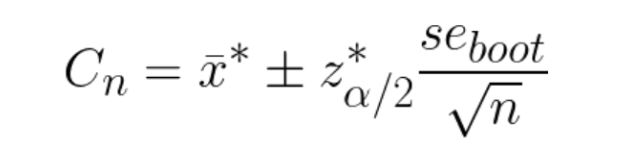

## 2. Normal Interval bootstrapping
* Same process with the normal bootstrapping but drop out the denominator of the std.error.


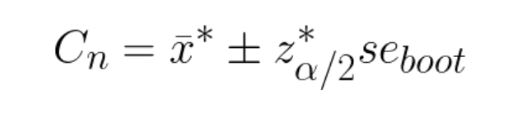

## 3. Empirical bootstrap
* After obtaining the bootstrap data set and calculate the desired statistic that we want to analyze, calculate $\delta = x_{boot} - \bar{x} $ for each bootstrap estimate.

* sort the $\delta_{i} $ from smallest to largest
* choose the 5th & 95th percentile of the sorted list of $\delta$ which gives us the 90% confidence interval of $\ \bar{x}$

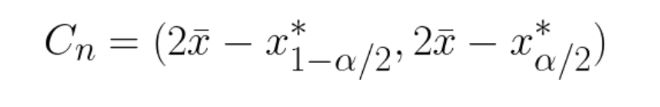

## 4. Parametric bootstrap
* Similar to the the empirical bootstrap except for the source of the sampled bootstrap data is generated from a parametrized distribution.

## 5. Percentile bootstrap
Our simulation start here:
* generate bootstrap datasets
* calculate desired statistics from the datasets
* sort the bootstrap estimate from lowest to highest
* choose the 5th & 95th percentile.

Let's say our observed data is coming from a beta distribution with a=10 and b=2. Theoretically, the population mean will be 
$$ E(X) = \frac{\alpha}{\alpha + \beta} = \frac{10}{12} $$.

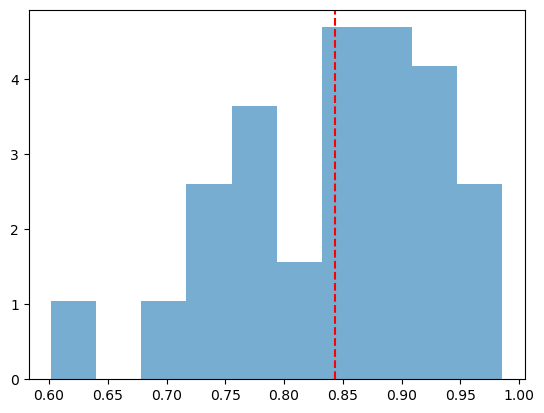

In [9]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(98347)
obs_data = beta.rvs(a=10, b=2, size=50) #this is the observed sample
fig, ax = plt.subplots()
ax.hist(obs_data, density=True, alpha=0.6)
plt.axvline(np.mean(obs_data),linestyle='dashed', color='red')

In [10]:
np.mean(obs_data)

0.8431006776365559

In [11]:
10/12

0.8333333333333334

90% C.I of bootstrap estimate:

In [37]:
def boot_meanCI(obs_data, n_sample=100, n_boot=1000, ci_interval=95):
    boot_dataset = np.random.choice(obs_data, (n_sample, n_boot))
    boot_mean = np.mean(boot_dataset, axis=0) #gives n_sample mean
    upper_bound = np.percentile(boot_mean, 100-(100-ci_interval)/2)
    lower_bound = np.percentile(boot_mean, (100-ci_interval)/2)
    return (lower_bound, upper_bound)    

In [38]:
boot_meanCI(obs_data, n_sample=99, n_boot=10000, ci_interval=90)

(0.8281010131373172, 0.8576974963960329)

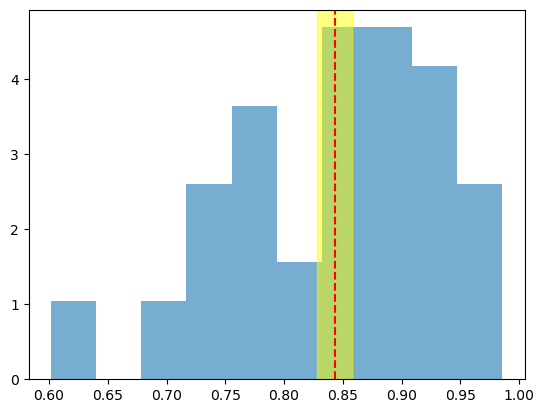

In [40]:
lower, upper = boot_meanCI(obs_data, n_sample=99, n_boot=10000, ci_interval=90)
fig, ax = plt.subplots()
ax.hist(obs_data, density=True, alpha=0.6)
plt.axvline(np.mean(obs_data),linestyle='dashed', color='red')
ax.axvspan(lower, upper, alpha=0.5, color='yellow')

comparing our result with the scipy.stats.bootstrap method

In [44]:
from scipy.stats import bootstrap
data = (obs_data,) # must be a sequence

ci = bootstrap(data, np.mean, confidence_level = 0.9 , random_state=98347, method = 'percentile')
ci.confidence_interval

ConfidenceInterval(low=0.8221185937926611, high=0.8634133997371624)

which is close to our C.I. 

To summarize, we have seen how one could use bootstrapping technique to calculate the desired statistic and it's confidence interval. In practice, the percentile method is rarely use due to it's less power when dealing with a skewed bootstrap datasets (not all sampled data with replacement will end up following the normal distribution). Analysts or researcher often use the bias-corrected method to produce a more symmetric confidence interval, thus decreasing the type 1 error rate.

Text(0.5, 1.0, 'distribution of our bootstrapped mean')

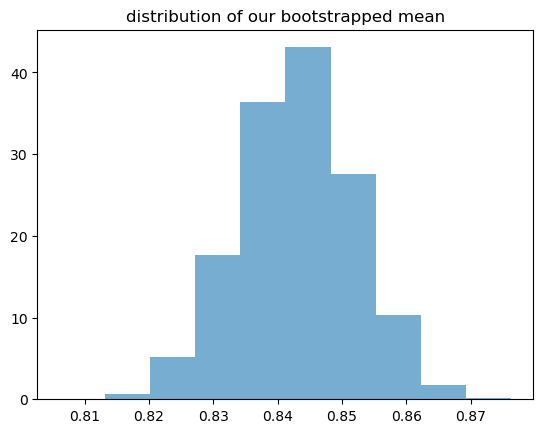

In [46]:
boot_dataset = np.random.choice(obs_data, (99, 10000))
boot_mean = np.mean(boot_dataset, axis=0)
fig, ax = plt.subplots()
ax.hist(boot_mean, density=True, alpha=0.6)
plt.title('distribution of our bootstrapped mean')